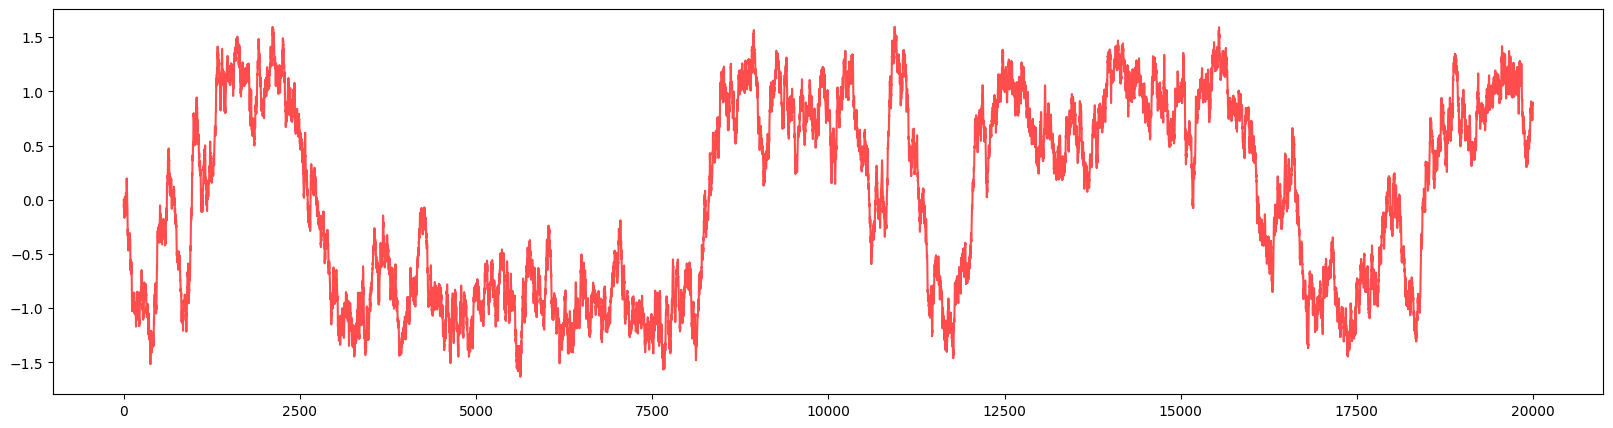

In [21]:
from PyFuncs import Functions
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

data = np.loadtxt("data/Langevin_1D.txt")
cps = np.loadtxt("data/ChangePts.txt")
data=data[0:100000]
SAMPLES_PER_BIN = 100
SAMPLE_COUNT = len(data)
BIN_COUNT = int(SAMPLE_COUNT / SAMPLES_PER_BIN)
bins = np.array_split(data, BIN_COUNT)

Points = []
for b in bins:
    pts = np.sort(b)
    Points.append(pts)
    
df = pd.DataFrame(Points) 
np_arr = np.array(Points)

plt.figure(figsize=(20, 5))
plt.plot(np.arange(20000), data[:20000], 'r', alpha=0.7)

In [36]:
def plt_cdf(dat, bins, start, stop, bs):
    cmap = plt.cm.viridis
    # Normalize the indices to range [0, 1]
    norm = Normalize(vmin=0, vmax=len(bins)-1)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
    
    ax1.plot(np.arange(100000), dat, 'r')
    ax1.vlines(start*bs, -2, 2, linestyle='dashed')
    ax1.vlines(stop*bs, -2, 2, linestyle='dashed')
    
    for i, lst in enumerate(bins):
        ax2.plot(np.sort(lst), np.arange(100), c=cmap(norm(i)))
        ax2.plot(min(bins[i]), 0, 'x') 
        ax2.annotate((start+i)*bs, (min(bins[i]), 0))

    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Time')
    
    # Fix the tick locations etc.. for the colorbar
    cbar.set_ticks([0,len(bins)-1])  
    cbar.set_ticklabels([start*bs, stop*bs])

    plt.xlabel('Position')
    plt.title('Empirical CDFs')
    plt.savefig("Fig.png")
    plt.show()

# List of change points

In [37]:
print(cps)

[  474.  1300.  2500.  2900.  8150.  8400. 11200. 11450. 12000. 12100.
 16000. 16700. 18400. 18700. 21900. 22200. 24000. 24300. 25250. 25900.
 27570. 27760. 27860. 28670. 29670. 32120. 32400. 33910. 34050. 35780.
 36250. 43000. 43220. 50600. 50800. 51540. 51900. 53730. 54230. 57750.
 57960. 58460. 58660. 59360. 59680. 62360. 62700. 63380. 63560. 63748.
 64000. 71000. 71300. 71880. 72090. 80250. 80640. 85090. 85390. 85610.
 85830. 87760. 87860. 90100. 90250. 96940. 97160.]


# Viz of CDFs in Transition Regions

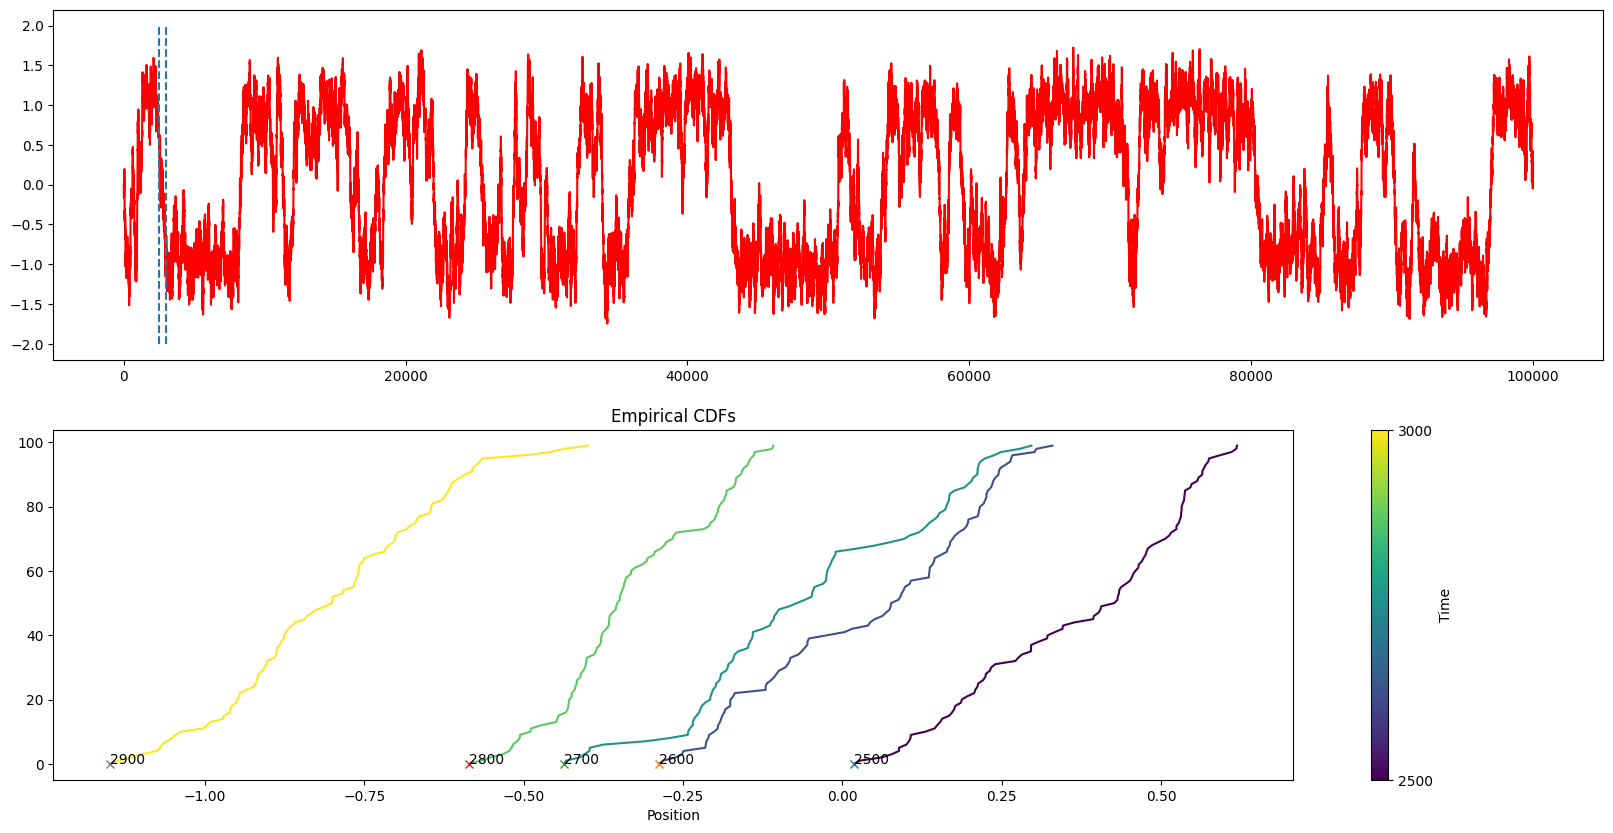

In [38]:
#Transition region 2500-2900
plt_cdf(data, bins[25:30], 25, 30, 100)

# Viz of CDFs in Metastable Regions

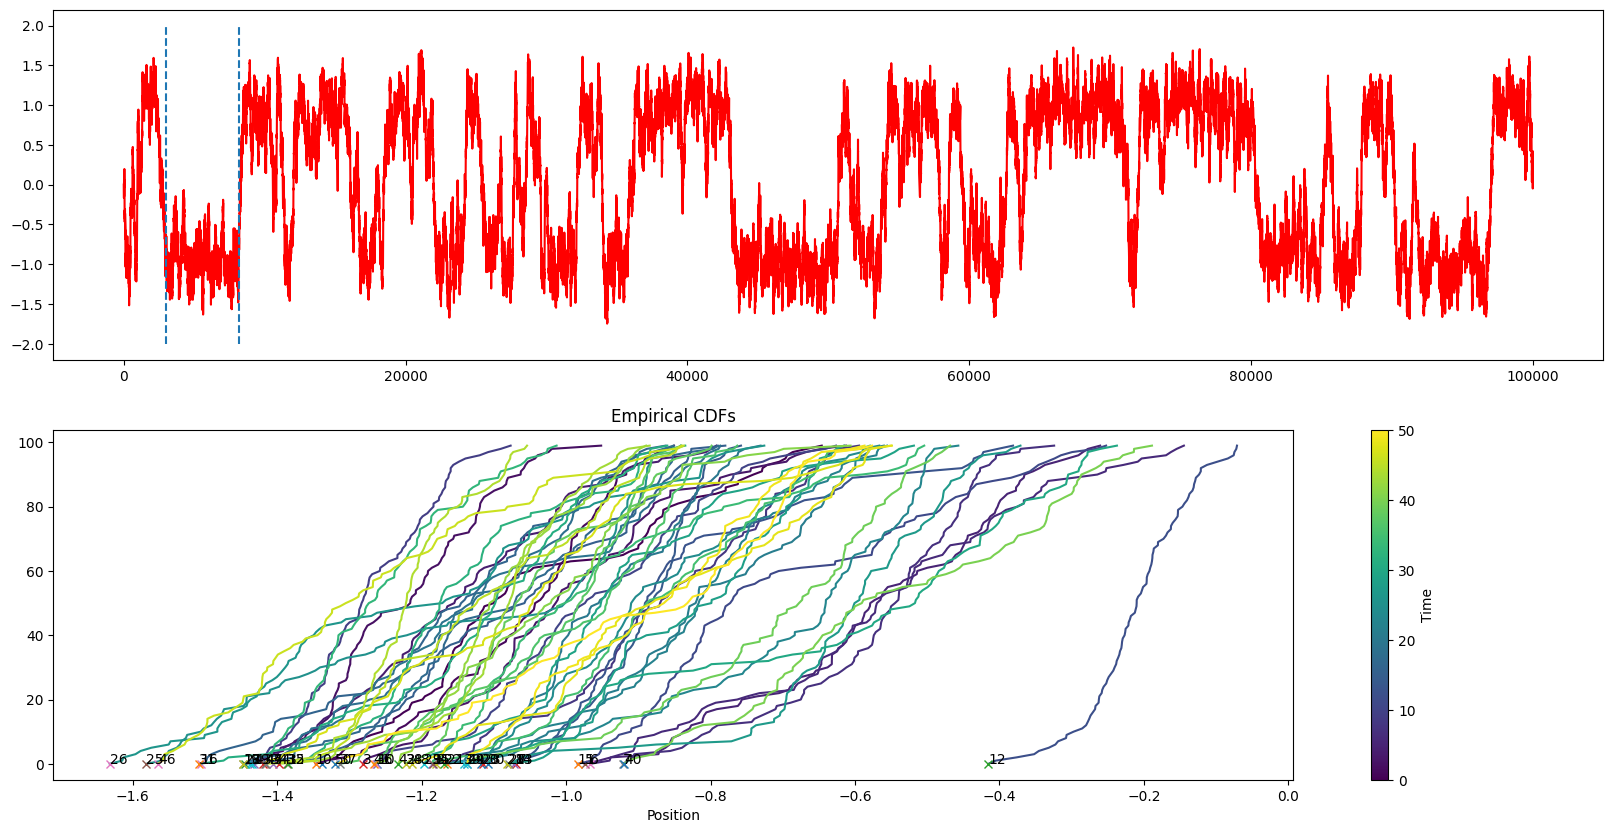

In [14]:
#Metastable state 3000-8150
plt_cdf(data, bins[30:81], 30, 82, 100)


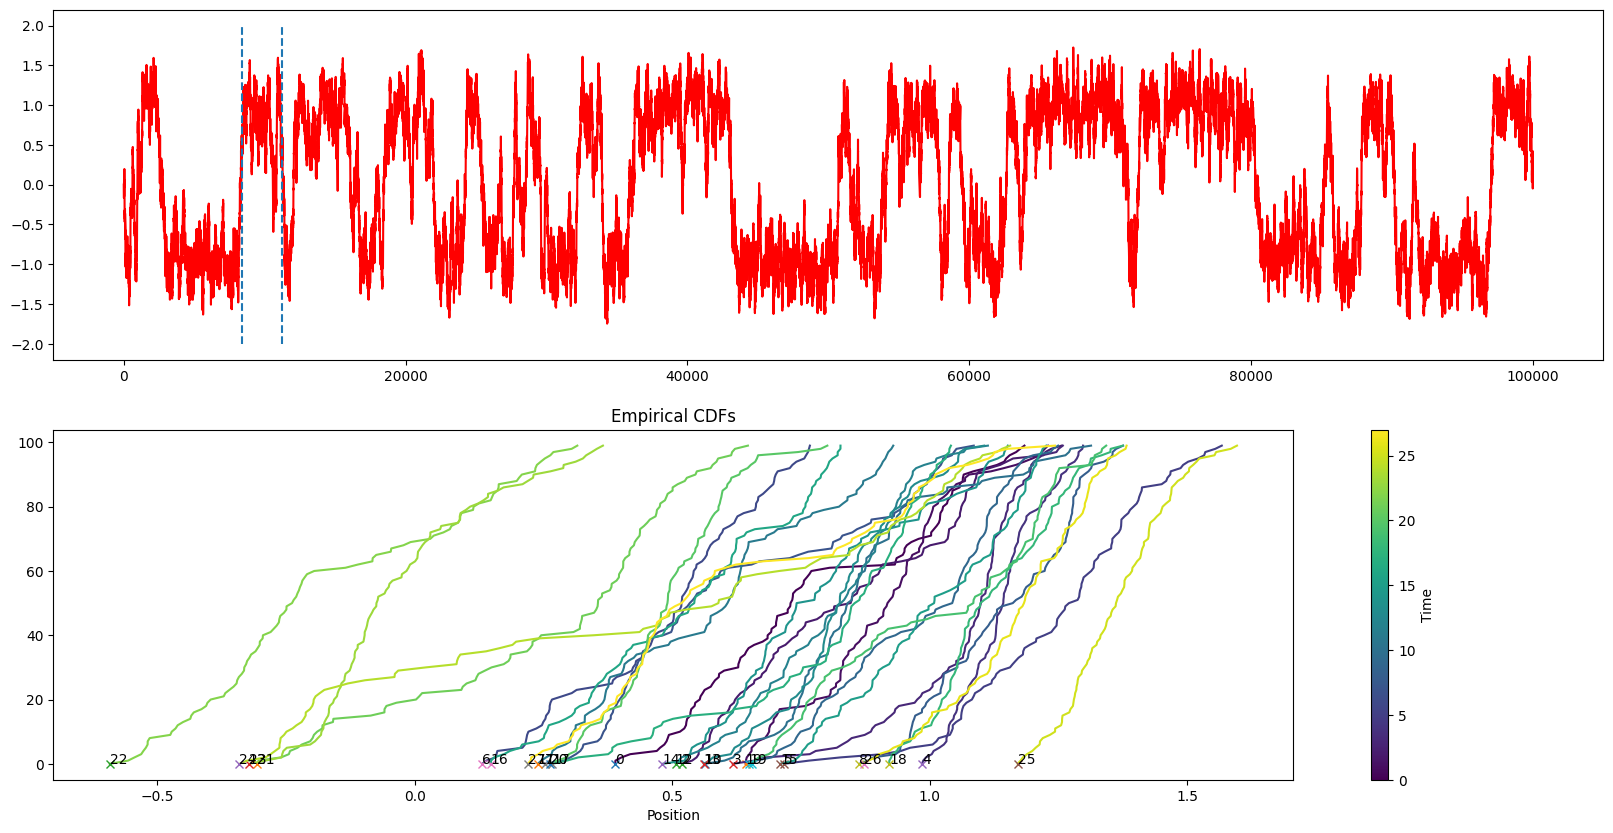

In [17]:
#Metastable state 8400-11200
plt_cdf(data, bins[84:112], 84, 112, 100)

In [66]:
#scipy.signal.find_peaks_cwt
#scipy.signal.find_peaks